# Aerosol Optics

The optical properties of aerosol particles are largely determined by the ratio  $a/\lambda$,
where $\lambda$ is the wavelength of incident light and $a$ is the characteristic size of a particle
(radius of droplet or a side of a cubic crytal). Therefore, information on typical sizes of sea-salt particles
is of great importance for aerosol optics. This has  been studied in numerous experiments. In particular,
Clarke et al. (2005) found that dry sizes of sea-salt particles are in the range $0.1$ to $10\ \mu\text{m}$.
The number concentration $N$ of sea-salt particles in the open ocean is usually around $250\ \text{cm}^{-3}$.
The value of $N$ of sea-salt particles with typical sizes around $0.3\ \mu\text{m}$. The particle size distribution
of sea-salt aerosol is usually modeled using the lognormal law:

In [ ]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import lognorm, norm
from physipy import units, constants
# from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
sp.init_printing(use_latex=True)

$a$ $-$ radius of spherical homogeneous particle

$\sigma=0.9$

$a_0=0.3\ \mu\text{m}$

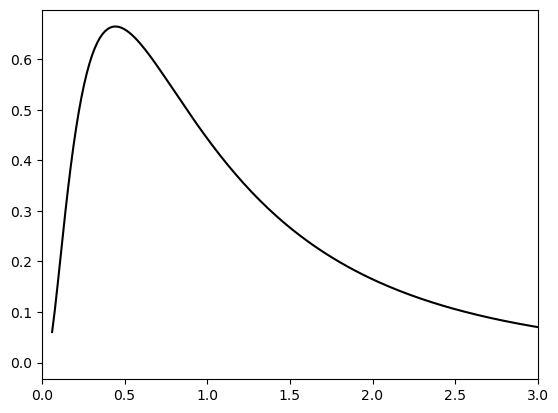

In [ ]:
s = 0.9
x = np.linspace(lognorm.ppf(0.001, s), lognorm.ppf(0.999, s), 1000)
plt.plot(x, lognorm.pdf(x, s), "k-", label="lognorm pdf")
plt.xlim(0, 3)
plt.show()

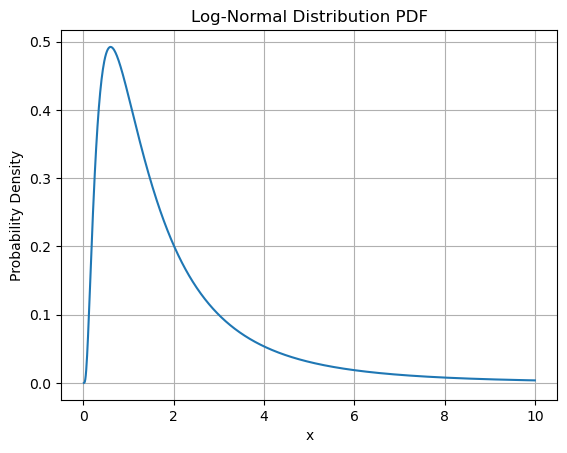

Integral from 0 to infinity: 1.0000000000000016
2.0238466848552816
[2.26083512e+00 7.72483278e-05]


In [52]:
# Parameters for the log-normal distribution
mu = 0.3  # Mean of the underlying normal distribution
sigma = 0.9  # Standard deviation of the underlying normal distribution

# Create x values
x = np.linspace(0.01, 10, 1000)  # Start from a small positive number

# Calculate the log-normal PDF using scipy.stats
pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))
def avg_size_integrand(x, sigma, mu):
    return x*lognorm.pdf(x, sigma, scale=np.exp(mu))

def std_dev_integrand(x, sigma, mu):
    return np.pow(x - quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0], 2)*lognorm.pdf(x, sigma, scale=np.exp(mu))

# Calculate the integral from 0 to infinity
integral, error = quad(lognorm.pdf, 0, np.inf, args=(sigma, 0, np.exp(mu)))
avg_size, error = quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))
stdev = np.sqrt(quad(std_dev_integrand, 0, np.inf, args=(sigma, mu)))


# Plot the PDF
plt.plot(x, pdf)
plt.title('Log-Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Print the integral
print(f"Integral from 0 to infinity: {integral}")
print(avg_size)
print(stdev)

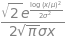

In [ ]:
x, mu, sigma = sp.symbols('x mu sigma')
psd_lognormal = (1/(sp.sqrt(2*sp.pi)*sigma*x))*sp.exp((sp.ln(x/mu)**2)/(2*sigma**2))
f_psd_lognormal = sp.lambdify([sigma, x, mu], psd_lognormal)
psd_lognormal

In [ ]:
sigma, mu = 0.9, 0.3

def lognormal(x, sigma, mu):
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return front_coef*np.exp(exp_power)

test_quad = quad(lognormal, 0, np.inf, args=(sigma, mu))
test_lognormal = lognormal(1, 1, 1)
test_psd = f_psd_lognormal(1, 1, 1) # for further integrals use manual functions and quad

def avg_size_integrand(x, sigma, mu):
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return x*front_coef*np.exp(exp_power)

def stdev_integrand(x, sigma, mu):
    return (x - quad(avg_size_integrand, 0, np.inf, args=(sigma, mu)))**2*lognormal(x, sigma, mu)

def stdev_delta(sigma, mu):
    return np.sqrt(quad(std_dev_integrand, 0, np.inf, args=(sigma, mu))[0])

def a_bar(sigma, mu):
    return mu*np.exp(0.5*sigma**2)

def big_c(sigma):
    return np.sqrt(np.exp(sigma**2) - 1)

def effective_radius_numerator_integrand(x, sigma, mu):
    return x**3*lognormal(x, sigma, mu)

def effective_radius_denominator_integrand(x, sigma, mu):
    return x**2*lognormal(x, sigma, mu)

def effective_radius_numerator(sigma, mu):
    return quad(effective_radius_numerator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_radius_denominator(sigma, mu):
    return quad(effective_radius_denominator_integrand, 0, np.inf, args=(sigma, mu))[0]

def effective_radius(sigma, mu):
    return effective_radius_numerator(sigma, mu) / effective_radius_denominator(sigma, mu)

def effective_variance_numerator_integrand(x, sigma, mu):
    return 
    
test_avg_size = quad(avg_size_integrand, 0, np.inf, args=(sigma, mu))[0]
test_stdev = stdev_delta(sigma, mu)
coef_of_variance = test_stdev / test_avg_size
test_big_c = big_c(sigma)
test_a_bar = a_bar(sigma, mu)
test_coef_again = test_stdev / test_a_bar
test_effective_radius = effective_radius(sigma, mu)

print(test_quad[0])
print(test_lognormal)
print(test_psd)
print(test_avg_size)
print(test_a_bar)
print(test_big_c)
print(test_effective_radius)

1.0000000000006777
0.3989422804014327
0.39894228040143276
0.4497907500176589
0.4497907500170301
1.1170980201739111
2.2728332833895966
